bgr.shape (200, 200, 3)
pocet radku: 200
pocet sloupcu: 200


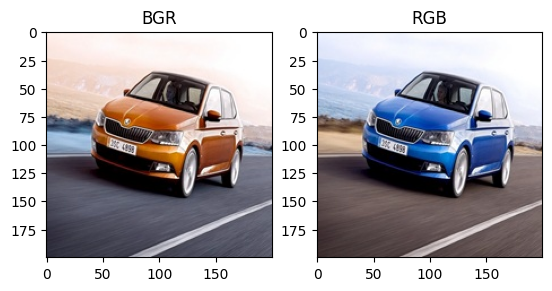

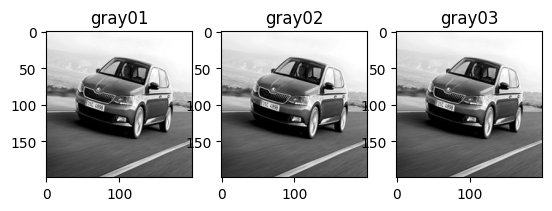

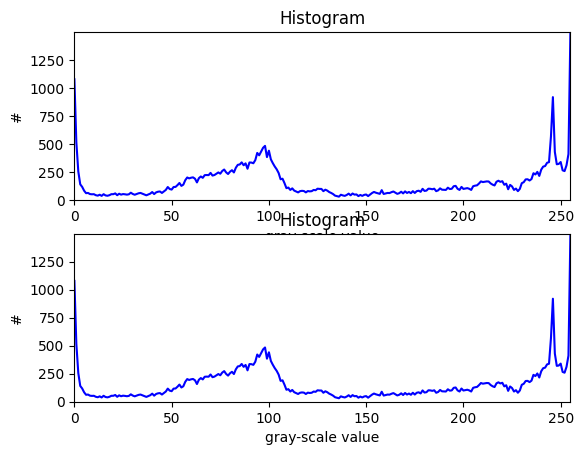

In [1]:
# -*- coding: utf-8 -*-

# Import potrebnych modulu (knihoven):
# ------------------------------------

# Modul numpy obsahuje vsechno potrebne pro praci s poli a maticemi. Skladba
# prikazu (nazvy i parametry) velmi verne kopiruje Matlab.
import numpy as np

# Knihovna matplotlib se stara o vykreslovani grafu do oken ci souboru
# (podporuje # napr. export do pdf). Submodul pyplot pak nabizi syntaxi velmi
# podobnou jazyku Matlab.
import matplotlib.pyplot as plt

# OpenCV je velmi rozsirena C++ knihovna obsahujici nastroje pro zpracovani a
# rozpoznavani obrazu. Modul cv2 je wrapper umoznujici jeji pouziti primo
# v Pythonu.
import cv2

# Pro nacteni obrazku z disku pouzijeme knihovnu OpenCV. Obrazek bude nacten
# jako trojrozmerna matice o rozmerech (vyska, sirka, pocet kanalu). OpenCV
# nacte kanaly v poradi B, G, R, tj. bgr[:,:,0] bude modra slozka.

plt.close('all')



bgr = cv2.imread('cv01_auto.jpg')

plt.subplot(1, 2, 1)
plt.imshow(bgr)
plt.title('BGR')

rgb = cv2.cvtColor(bgr, cv2.COLOR_RGB2BGR)

plt.subplot(1, 2, 2)
plt.imshow(rgb)
plt.title('RGB')




# Vlastnost shape poli a matici numpy obsahuje jejich rozmery. bgr.shape je
# ntice (python tuple) udavajici pocet radku, pocet sloupcu, ..., v tomto
# poradi.

sirka = bgr.shape[1]
vyska = bgr.shape[0]
print('bgr.shape', bgr.shape)
print('pocet radku: {0}'.format(vyska))
print('pocet sloupcu: {0}'.format(sirka))




# Nyni prevedeme obrazek do stupnu sedi. To provedeme jako vazeny soucet
# jednotlivych kanalu. Jednotlive slozky ziskame podobne jako v Matlabu
# maticovym indexovanim. Zde bychom mohli pouzit take funkci OpenCV split:
# B, G, R = cv2.split(bgr).
B, G, R = bgr[:,:,0], bgr[:,:,1], bgr[:,:,2]

gray01 = 0.3*R + 0.59*G + 0.11*B

gray02 = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

gray03 = np.zeros((vyska, sirka))

for x in range(0, sirka):
    for y in range(0, vyska):
        gray03[y, x] = 0.3*rgb[y,x,0] + 0.59*rgb[y,x,1] + 0.11*rgb[y,x,2] # pomale, prevest na matice


plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(gray01, cmap='gray')
plt.title('gray01')
plt.subplot(1, 3, 2)
plt.imshow(gray02, cmap='gray')
plt.title('gray02')
plt.subplot(1, 3, 3)
plt.imshow(gray03, cmap='gray')
plt.title('gray03')



# Nyni vypocteme histogram jasovych hodnot pro kazdou slozku. K tomu si
# nadefinujeme specialni funkci, ktera bude jako argument prejimat matici a
# vracet rozlozeni cetnosti jejich hodnot.
def histogram(x):
    # Nejprve inicializujeme pole cetnosti jasu na nuly.
    h = np.zeros(256)

    # Funkce range vrati seznam hodnot od nuly do zadaneho parametru (avsak
    # BEZ nej). Dvojitym for cyklem tejdy projdeme cely obrazek a pro kazdy
    # pixel pricteme +1 na odpovidajici pozici v histogramu.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            h[x[i,j]] += 1

    return h



h01 = histogram(gray01.astype(int))
h02 = cv2.calcHist([gray01.astype('uint8')], [0], None, [256], [0, 256])


plt.figure()
plt.subplot(2, 1, 1)
plt.plot(h01, '-b')
plt.xlim((0, 255))
plt.ylim((0, np.max(h01)))
plt.title('Histogram')
plt.xlabel('gray-scale value')
plt.ylabel('#')

plt.subplot(2, 1, 2)
plt.plot(h02, '-b')
plt.xlim((0, 255))
plt.ylim((0, np.max(h02)))
plt.title('Histogram')
plt.xlabel('gray-scale value')
plt.ylabel('#')

plt.show()

cv01_u01.jpg je nejvice podobny: cv01_jablko.jpg


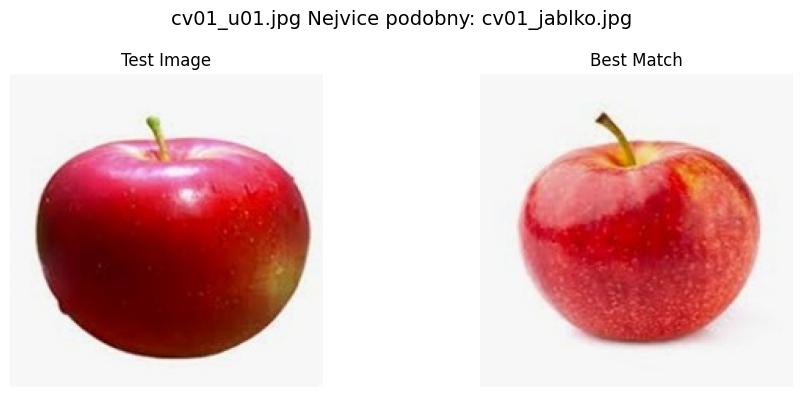

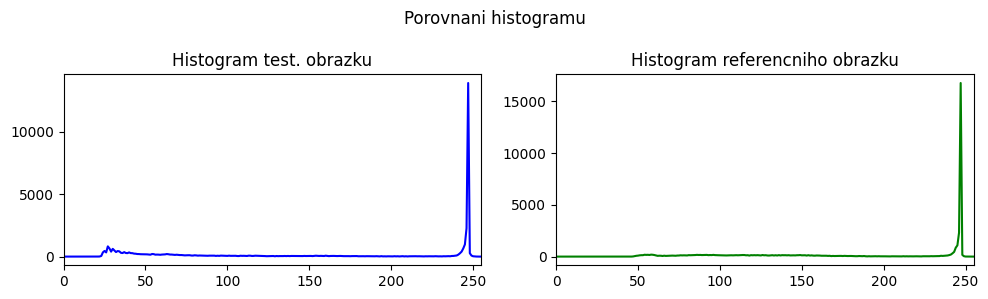

cv01_u02.jpg je nejvice podobny: cv01_auto.jpg


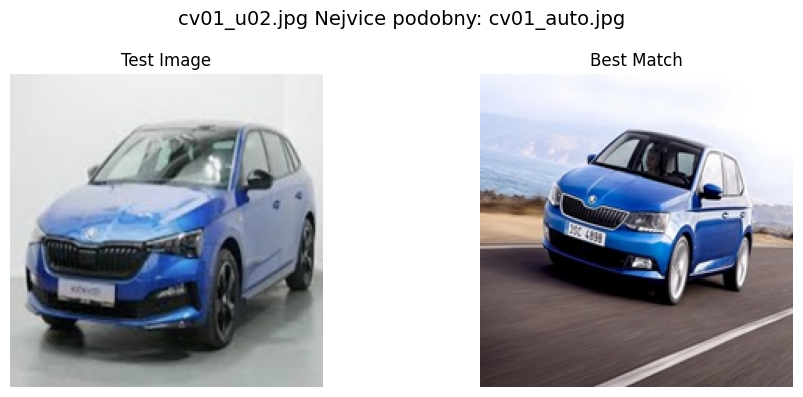

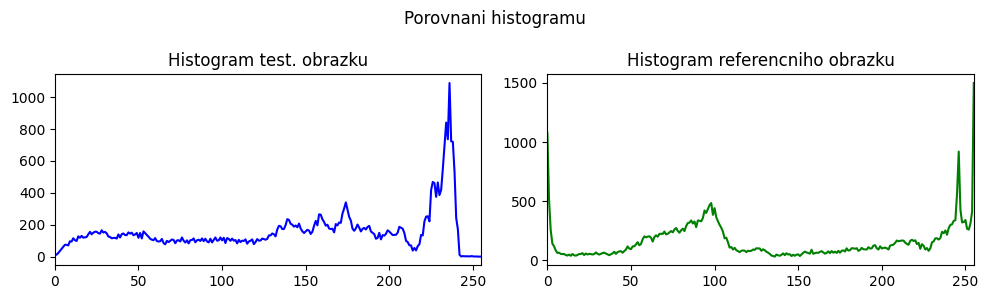

cv01_u03.jpg je nejvice podobny: cv01_mesic.jpg


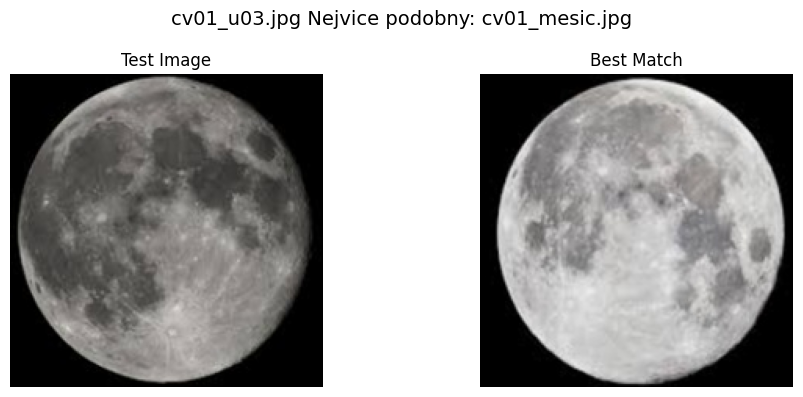

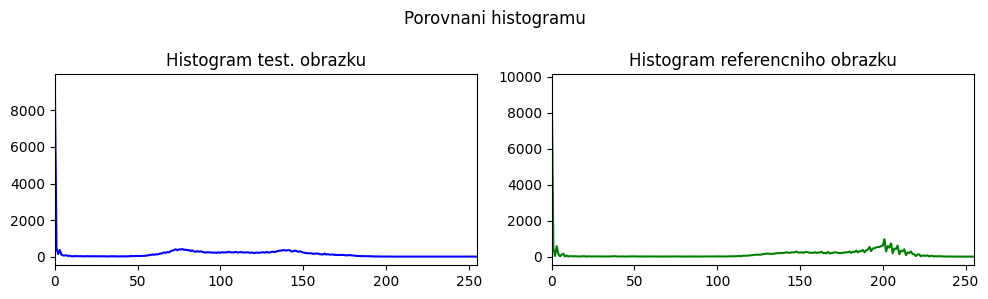

In [6]:

ref_images = ['cv01_auto.jpg', 'cv01_jablko.jpg', 'cv01_mesic.jpg']
test_images = ['cv01_u01.jpg', 'cv01_u02.jpg', 'cv01_u03.jpg']


ref_hists = []
ref_rgbs = []

for filename in ref_images:
    img = cv2.imread(filename)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = 0.3 * img[:, :, 2] + 0.59 * img[:, :, 1] + 0.11 * img[:, :, 0]
    h = histogram(gray.astype(int))
    ref_hists.append(h)
    ref_rgbs.append(rgb)


for i, filename in enumerate(test_images):
    img = cv2.imread(filename)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = 0.3 * img[:, :, 2] + 0.59 * img[:, :, 1] + 0.11 * img[:, :, 0]
    test_hist = histogram(gray.astype(int))

    dist = np.zeros(3)
    for j in range(3):
        dist[j] = np.linalg.norm(test_hist - ref_hists[j])

    best_match = np.argmin(dist)

    print(f'{filename} je nejvice podobny: {ref_images[best_match]}')

    # plot obrazku
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'{filename} Nejvice podobny: {ref_images[best_match]}', fontsize=14)

    plt.subplot(1, 2, 1)
    plt.imshow(rgb)
    plt.title('Test Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(ref_rgbs[best_match])
    plt.title('Best Match')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # plot histogramuu
    plt.figure(figsize=(10, 3))
    plt.suptitle('Porovnani histogramu')

    plt.subplot(1, 2, 1)
    plt.plot(test_hist, color='blue')
    plt.title('Histogram test. obrazku')
    plt.xlim(0, 255)

    plt.subplot(1, 2, 2)
    plt.plot(ref_hists[best_match], color='green')
    plt.title('Histogram referencniho obrazku')
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()